## Introduction
##### Exploratory Data Analysis (EDA)

This section explores crime patterns and trends across the **Metropolitan**, **Kent**, **Surrey**, and **Essex** police forces between **September 2023 and September 2025**.  
The aim is to uncover how crime levels, types, and outcomes vary across regions and over time, providing data-driven insights into policing and public safety.

The analysis is structured around five key questions:

1. 🗺️ **Regional Comparison** – Which police forces have the highest and lowest overall crime counts over the two-year period?  
2. 📈 **Temporal Trends** – How has crime changed over time (monthly and yearly) for each region?  
3. 🚔 **Crime Type Distribution** – What are the most common types of crime, and how do they vary between police forces?  
4. ⚖️ **Crime Outcomes** – What are the proportions of different crime outcomes (e.g., investigation complete, no suspect identified) in each region?  
5. 🌦️ **Seasonal and Monthly Patterns** – Are there particular months or seasons with higher crime rates?

Each subsection includes clear **visualisations**, **tables**, and **short explanations** to interpret the findings and highlight meaningful insights from the data.

Click on a question below to jump to its corresponding section:

1. [Regional Comparison](#1-regional-comparison)
2. [Temporal Trends](#2-temporal-trends)
3. [Crime Type Distribution](#3-crime-type-distribution)
4. [Crime Outcomes](#4-crime-outcomes)
5. [Seasonal and Monthly Patterns](#5-seasonal-and-monthly-patterns)




In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 


In [3]:
clean_pf_data = pd.read_csv("Clean_policeforce_data/All_Forces_Cleaned_2023_2025.csv")

In [4]:
#basic checks
print(clean_pf_data.shape)
print(clean_pf_data.columns)


(3027419, 16)
Index(['Crime ID', 'Month', 'Reported by', 'Falls within', 'Longitude',
       'Latitude', 'Location', 'LSOA code', 'LSOA name', 'Crime type',
       'Last outcome category', 'Police_Force', 'Month_Folder', 'Year',
       'Month_number', 'Month_name'],
      dtype='object')


In [5]:
print(clean_pf_data.isna().sum())

Crime ID                  352535
Month                    3027419
Reported by                    0
Falls within                   0
Longitude                  22470
Latitude                   22470
Location                       0
LSOA code                  22471
LSOA name                  22471
Crime type                     0
Last outcome category          0
Police_Force                   0
Month_Folder                   0
Year                     3027419
Month_number             3027419
Month_name               3027419
dtype: int64


In [6]:
clean_pf_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3027419 entries, 0 to 3027418
Data columns (total 16 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Crime ID               object 
 1   Month                  float64
 2   Reported by            object 
 3   Falls within           object 
 4   Longitude              float64
 5   Latitude               float64
 6   Location               object 
 7   LSOA code              object 
 8   LSOA name              object 
 9   Crime type             object 
 10  Last outcome category  object 
 11  Police_Force           object 
 12  Month_Folder           object 
 13  Year                   float64
 14  Month_number           float64
 15  Month_name             float64
dtypes: float64(6), object(10)
memory usage: 369.6+ MB


In [7]:
clean_pf_data.head()

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,Police_Force,Month_Folder,Year,Month_number,Month_name
0,c0e2379bc1123d4a70f550e243f0b2ace4f5628a66f5cb...,NaN,Metropolitan Police Service,Metropolitan Police Service,0.871752,51.138669,Sydney Street,E01024002,Ashford 005B,Violence and sexual offences,Status update unavailable,Metropolitan,2023-09,NaN,NaN,NaN
1,06e5cb4c224db8e47a710817fdbb12ec3af70240d55c3a...,NaN,Metropolitan Police Service,Metropolitan Police Service,0.872990,51.169408,Bloomsbury Way,E01023980,Ashford 015A,Violence and sexual offences,Investigation complete; no suspect identified,Metropolitan,2023-09,NaN,NaN,NaN
2,a751c16858b21909cdb20e928e03b7bf372be81772f334...,NaN,Metropolitan Police Service,Metropolitan Police Service,0.140127,51.588913,Beansland Grove,E01000027,Barking and Dagenham 001A,Criminal damage and arson,Unable to prosecute suspect,Metropolitan,2023-09,NaN,NaN,NaN
3,927e7e454a9e3f1701a266d1075c65f24edda2a7861f69...,NaN,Metropolitan Police Service,Metropolitan Police Service,0.140194,51.582356,Hatch Grove,E01000027,Barking and Dagenham 001A,Drugs,Investigation complete; no suspect identified,Metropolitan,2023-09,NaN,NaN,NaN
4,d4b5d5f85bb768a7ddd80622f8c352f96d5680f7d442e2...,NaN,Metropolitan Police Service,Metropolitan Police Service,0.140576,51.583419,Rams Grove,E01000027,Barking and Dagenham 001A,Drugs,Investigation complete; no suspect identified,Metropolitan,2023-09,NaN,NaN,NaN


In [8]:
clean_pf_data.tail()

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,Police_Force,Month_Folder,Year,Month_number,Month_name
3027414,cd4c0a92c9ae0e7363c2fc732b6c04cb96b8160f6a3b9d...,NaN,Essex Police,Essex Police,NaN,NaN,No Location,NaN,NaN,Other crime,Investigation complete; no suspect identified,Essex,2025-09,NaN,NaN,NaN
3027415,848236efd19046482f3b4003f5459be4b094331fa91f62...,NaN,Essex Police,Essex Police,NaN,NaN,No Location,NaN,NaN,Other crime,Investigation complete; no suspect identified,Essex,2025-09,NaN,NaN,NaN
3027416,6462152a794123f9f20f6b8c4bef4d6ef591422897fb7a...,NaN,Essex Police,Essex Police,NaN,NaN,No Location,NaN,NaN,Other crime,Investigation complete; no suspect identified,Essex,2025-09,NaN,NaN,NaN
3027417,aaa389be6fbc3f7ef13a67496a453b48845402f465a020...,NaN,Essex Police,Essex Police,NaN,NaN,No Location,NaN,NaN,Other crime,Investigation complete; no suspect identified,Essex,2025-09,NaN,NaN,NaN
3027418,ae8f2b11e84fc3cd4dd54072f9069a737f93daf5c4bc68...,NaN,Essex Police,Essex Police,NaN,NaN,No Location,NaN,NaN,Other crime,Under investigation,Essex,2025-09,NaN,NaN,NaN


### Fixing and Extracting Date Information

Even after cleaning, the **Month** column in the dataset was not properly formatted as a date.  
To fix this, the `Month_Folder` column (which contains values like “2023-09”) was converted into a proper **datetime** format using `pd.to_datetime()`.


In [ ]:
clean_pf_data["Month"] = pd.to_datetime(clean_pf_data["Month_Folder"], format="%Y-%m", errors="coerce")

# extract useful components
clean_pf_data["Year"] = clean_pf_data["Month"].dt.year
clean_pf_data["Month_number"] = clean_pf_data["Month"].dt.month
clean_pf_data["Month_name"] = clean_pf_data["Month"].dt.strftime("%b")

In [10]:
clean_pf_data[["Month_Folder", "Month", "Year", "Month_number", "Month_name"]].sample(10)

,Month_Folder,Month,Year,Month_number,Month_name
537816,2024-03,2024-03-01,2024,3,Mar
31319,2023-09,2023-09-01,2023,9,Sep
2235953,2024-02,2024-02-01,2024,2,Feb
631416,2024-04,2024-04-01,2024,4,Apr
1793805,2025-05,2025-05-01,2025,5,May
1834990,2025-06,2025-06-01,2025,6,Jun
746128,2024-05,2024-05-01,2024,5,May
1850222,2025-06,2025-06-01,2025,6,Jun
989071,2024-08,2024-08-01,2024,8,Aug
2922759,2025-02,2025-02-01,2025,2,Feb


In [11]:
clean_pf_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3027419 entries, 0 to 3027418
Data columns (total 16 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   Crime ID               object        
 1   Month                  datetime64[ns]
 2   Reported by            object        
 3   Falls within           object        
 4   Longitude              float64       
 5   Latitude               float64       
 6   Location               object        
 7   LSOA code              object        
 8   LSOA name              object        
 9   Crime type             object        
 10  Last outcome category  object        
 11  Police_Force           object        
 12  Month_Folder           object        
 13  Year                   int32         
 14  Month_number           int32         
 15  Month_name             object        
dtypes: datetime64[ns](1), float64(2), int32(2), object(11)
memory usage: 346.5+ MB


## 1. Regional Comparison
### Question 1: Regional Comparison — Which police forces have the highest and lowest overall crime counts (2023–2025)?

In this section, I aim to identify which of the four selected police forces — **Metropolitan, Kent, Surrey, and Essex** — recorded the highest and lowest overall number of reported crimes across the two-year period.  

To do this, I will:
- Group the data by **Police_Force**
- Count the total number of crimes recorded for each region
- Visualise the results using a table called **force_crime_count** clear comparison  


[⬅️ Back to Introduction](#introduction)

In [12]:

# Count how many times each police force appears in the 'Reported by' column
force_crime_count = clean_pf_data["Reported by"].value_counts().reset_index()

# Rename the columns to make them clearer
force_crime_count.columns = ["Police Force", "Total Crimes"]

# Sort from highest to lowest
force_crime_count = force_crime_count.sort_values(by="Total Crimes", ascending=False)

# Show the table
force_crime_count



,Police Force,Total Crimes
0,Metropolitan Police Service,2156535
1,Kent Police,366684
2,Essex Police,326638
3,Surrey Police,177562


####  Insight
The **Metropolitan Police Service** reports by far the highest number of crimes, with over **2.1 million** incidents—unsurprising given that it covers London, the UK’s largest and most densely populated region.  
**Kent** and **Essex** follow next, showing similar crime volumes, while **Surrey Police** records the fewest offences overall.

This highlights a clear **regional disparity**: urban areas experience substantially higher crime activity compared to smaller suburban or rural regions.  
These findings provide an important baseline for the rest of the analysis, as they help explain differences seen later in crime types, outcomes, and seasonal patterns.

## 2. Temporal Trends
###  Question 2: Temporal Trends — How has crime changed over time (monthly and yearly trends) for each region?

In this section, I will explore how the number of reported crimes has changed over time for each of the four police forces — **Metropolitan, Kent, Surrey, and Essex**.  
#### IT IS IMPORTANT TO HIGHLIGHT THAT THE DATA IS BETWEEN SEPEMBER 2023 AND SEPTEMBER 2025 WHICH IS TWO YEARS 
To do this, I will:
- Group the data by **Month** and **Police_Force**
- Count the total number of crimes reported each month
- Visualise the trends using a **line chart**, showing how crime levels rise or fall over time for each region

This analysis helps identify seasonal patterns and whether crime levels have generally increased or decreased over the two-year period.

[⬅️ Back to Introduction](#introduction)

In [13]:
# started by finding out how much crime took place in each region from year 1 to year 2 
def assign_crime_year(date):
    if pd.Timestamp("2023-09-01") <= date <= pd.Timestamp("2024-09-30"):
        return "Year 1 (Sep 2023 - Sep 2024)"
    elif pd.Timestamp("2024-10-01") <= date <= pd.Timestamp("2025-09-30"):
        return "Year 2 (Oct 2024 - Sep 2025)"
    else:
        return None


In [14]:
clean_pf_data["Crime_Year"] = clean_pf_data["Month"].apply(assign_crime_year)

In [17]:
custom_yearly = (
    clean_pf_data.dropna(subset=["Crime_Year"])
    .groupby(["Crime_Year", "Police_Force"])
    .size()
    .reset_index(name="Total Crimes")
)

In [19]:
custom_yearly = custom_yearly.sort_values(by=["Police_Force", "Crime_Year"]).reset_index(drop=True)


In [20]:
custom_yearly

,Crime_Year,Police_Force,Total Crimes
0,Year 1 (Sep 2023 - Sep 2024),Essex,171645
1,Year 2 (Oct 2024 - Sep 2025),Essex,154993
2,Year 1 (Sep 2023 - Sep 2024),Kent,194593
3,Year 2 (Oct 2024 - Sep 2025),Kent,172091
4,Year 1 (Sep 2023 - Sep 2024),Metropolitan,1118131
5,Year 2 (Oct 2024 - Sep 2025),Metropolitan,1038404
6,Year 1 (Sep 2023 - Sep 2024),Surrey,91981
7,Year 2 (Oct 2024 - Sep 2025),Surrey,85581


#### Insight
Across all four police forces, there is a **noticeable decline in total crime** from the first year to the second.  
- The **Metropolitan Police** shows the largest decrease in raw numbers, dropping by about **80,000 offences**, which aligns with broader national patterns of slightly reduced urban crime in 2025.  
- **Kent** and **Essex** both experienced moderate decreases, roughly **10–12% fewer crimes** in the second year.  
- **Surrey** also saw a small decline, maintaining its position as the region with the lowest overall crime levels.  

This year-on-year reduction could suggest **improved policing strategies**, **shifts in reporting behaviour**, or **temporary external factors** such as weather, policy changes, or population movement affecting crime activity between 2024 and 2025. 

In [ ]:
# Monthly trend of crimes for each police force 

# Group by month and police force, counting total crimes per month
monthly_trend = (
    clean_pf_data.groupby(["Month", "Police_Force"])
    .size()
    .reset_index(name="Total Crimes")
)


In [23]:

# Sort the data by month for proper plotting
monthly_trend = monthly_trend.sort_values(by="Month")

# Check first few rows
monthly_trend.head()


,Month,Police_Force,Total Crimes
0,2023-09-01,Essex,13821
1,2023-09-01,Kent,16088
2,2023-09-01,Metropolitan,86041
3,2023-09-01,Surrey,7504
4,2023-10-01,Essex,14559


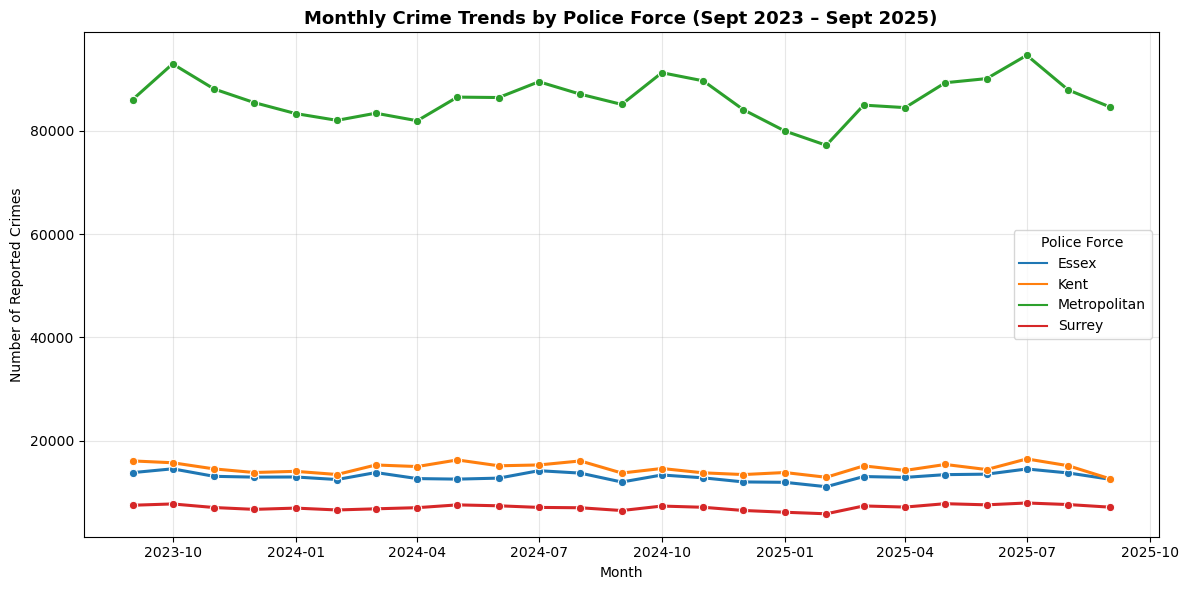

In [24]:

# --- Plotting the monthly trends ---
plt.figure(figsize=(12, 6))

sns.lineplot(
    data=monthly_trend,
    x="Month",
    y="Total Crimes",
    hue="Police_Force",
    marker="o",
    linewidth=2.2,
)

plt.title("Monthly Crime Trends by Police Force (Sept 2023 – Sept 2025)", fontsize=13, weight="bold")
plt.xlabel("Month")
plt.ylabel("Number of Reported Crimes")
plt.legend(title="Police Force")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### Insight: Monthly Crime Trends by Police Force (Sept 2023 – Sept 2025)

This chart shows how the number of reported crimes changed each month for the **Metropolitan, Kent, Surrey, and Essex** police forces between **September 2023 and September 2025**.

The **Metropolitan Police** had the highest number of reported crimes throughout the whole period, with figures staying fairly consistent month to month, though there are a few noticeable peaks around the middle of each year.  

Both **Kent** and **Essex** followed a similar pattern, with their numbers rising and falling slightly over time but generally remaining steady overall. **Surrey** consistently had the lowest number of reported crimes, showing only small changes between months.

Overall, crime levels appear to stay relatively stable across all regions, though larger areas such as London (covered by the Metropolitan Police) naturally experience higher volumes of reported incidents.


## 3. Crime Type Distribution
###  Question 3: Crime Type Distribution — What are the most common types of crimes across the regions?

In this section, I will explore the distribution of different types of crimes reported between **September 2023 and September 2025**.  
The goal is to identify which crime categories are most common overall and how they differ between regions.

By grouping the data by **crime type** and **police force**, I can see which types of offences occur most frequently and whether certain regions experience higher levels of specific crimes.  
This helps highlight potential problem areas and gives a better understanding of regional crime patterns.
[⬅️ Back to Introduction](#introduction)

In [26]:
# start with showing the top 10 most crimes 
top_crimes = (clean_pf_data["Crime type"].value_counts())
top_crimes

Crime type
Violence and sexual offences    887991
Anti-social behaviour           352535
Other theft                     292309
Vehicle crime                   251256
Shoplifting                     242660
Theft from the person           195535
Criminal damage and arson       192692
Public order                    176647
Burglary                        137909
Drugs                           118485
Robbery                          74720
Other crime                      48510
Bicycle theft                    37363
Possession of weapons            18807
Name: count, dtype: int64

In [29]:
top_crimes.head(10)

Crime type
Violence and sexual offences    887991
Anti-social behaviour           352535
Other theft                     292309
Vehicle crime                   251256
Shoplifting                     242660
Theft from the person           195535
Criminal damage and arson       192692
Public order                    176647
Burglary                        137909
Drugs                           118485
Name: count, dtype: int64

### Insight: Most Common Crime Types (Sept 2023 – Sept 2025)

The data shows that **Violence and sexual offences** were by far the most frequently reported crimes across all four regions, with nearly **900,000 recorded incidents** over the two-year period. This category alone makes up a large proportion of total crime reports.  

Following this, **Anti-social behaviour**, **Other theft**, and **Vehicle crime** were also common, each accounting for a significant number of cases.  
**Shoplifting**, **Theft from the person**, and **Criminal damage and arson** also appear regularly, reflecting a mix of both personal and property-related offences.  

Less frequent categories such as **Drugs**, **Robbery**, and **Possession of weapons** occur in much smaller numbers, suggesting these crimes are relatively less common across the selected regions.  



In [ ]:
# Starting with crime type breakdown by police force 

# Focusing on the top 10 crime types overall
top_10_types = clean_pf_data["Crime type"].value_counts().head(10).index
top_10_types


Index(['Violence and sexual offences', 'Anti-social behaviour', 'Other theft',
       'Vehicle crime', 'Shoplifting', 'Theft from the person',
       'Criminal damage and arson', 'Public order', 'Burglary', 'Drugs'],
      dtype='object', name='Crime type')

In [33]:

# Filtering dataset to only include those top 10 crimes
top_crime_data = clean_pf_data[clean_pf_data["Crime type"].isin(top_10_types)]

# Group by police force and crime type, count number of reports
crime_by_force = (
    top_crime_data.groupby(["Police_Force", "Crime type"])
    .size()
    .reset_index(name="Total Crimes")
)


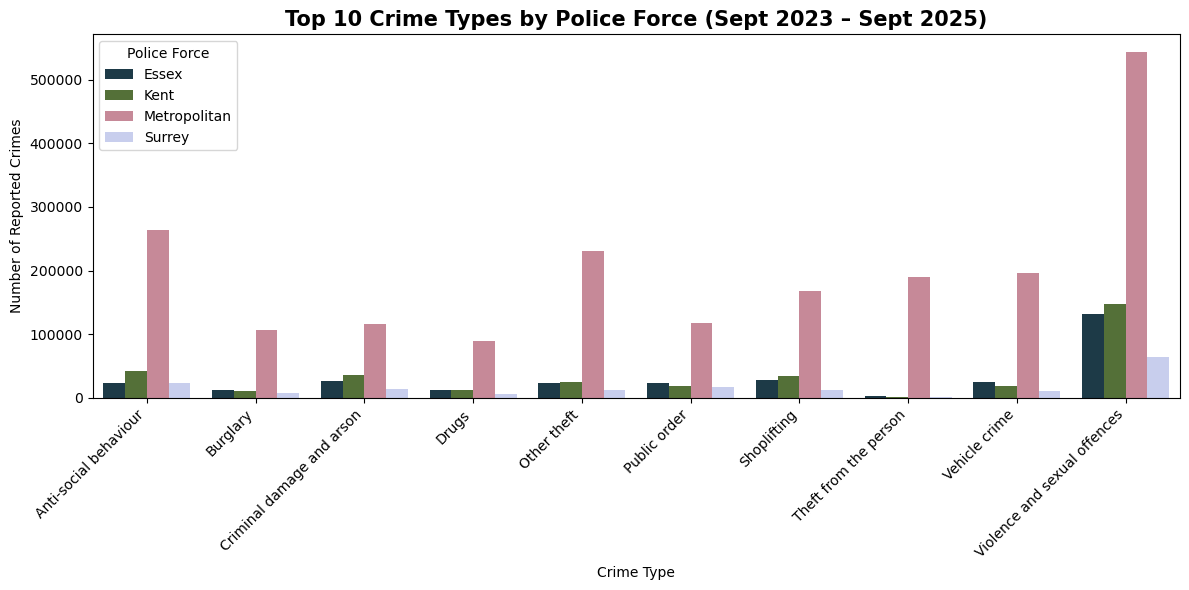

In [34]:

# --- Plot grouped bar chart ---
plt.figure(figsize=(12, 6))
sns.barplot(
    data=crime_by_force,
    x="Crime type",
    y="Total Crimes",
    hue="Police_Force",
    palette="cubehelix"
)

plt.title("Top 10 Crime Types by Police Force (Sept 2023 – Sept 2025)", fontsize=15, weight="bold")
plt.xlabel("Crime Type")
plt.ylabel("Number of Reported Crimes")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Police Force")
plt.tight_layout()
plt.show()


### Insight: Crime Type Comparison by Police Force

The chart clearly shows that the **Metropolitan Police** consistently reports the highest number of crimes across almost every category.  
This is expected given London’s large population and urban density, which naturally contribute to higher crime volumes.

The most frequent crimes for the Metropolitan area are **Violence and sexual offences**, **Other theft**, and **Vehicle crime**, with violence being by far the most dominant category.  
In contrast, **Kent** and **Essex** record noticeably lower totals across all types, though both show a relatively high number of **anti-social behaviour** and **shoplifting** offences compared to Surrey.

**Surrey Police** consistently reports the lowest numbers overall, which may reflect the region’s smaller population and more suburban environment.  

Overall, the data suggests that crime levels — particularly violent and theft-related offences — are most concentrated in metropolitan areas, while smaller counties experience far fewer incidents.

In [ ]:
# Count how many missing values there are in each region just to confirm any scew in data 
missing_crime_type = (
    clean_pf_data.groupby("Police_Force")["Crime type"]
    .apply(lambda col: col.isna().sum())
    .reset_index(name="Missing Crime Type Count")
)


In [ ]:
missing_crime_type
# the result show that there are no missing value in 'crime type'

,Police_Force,Missing Crime Type Count
0,Essex,0
1,Kent,0
2,Metropolitan,0
3,Surrey,0


## 4. Crime Outcomes
### Question 4: Crime Outcomes — What are the proportions of different outcomes in each region?

This section looks at the outcomes of reported crimes between **September 2023 and September 2025**.  
Each crime in the dataset includes an outcome category such as *“Investigation complete – no suspect identified”* or *“Offender given a caution.”*

By analysing these outcome categories across the four police forces, I can understand how crime resolution rates differ by region.  
This helps identify whether some areas tend to close more cases or record more unresolved incidents.
[⬅️ Back to Introduction](#introduction)

In [ ]:
#before starting i wanted to see how many missing / 'UNKNOWN' value there are in the crime outcome section first 
missing_crime_outcome =(clean_pf_data.groupby("Police_Force")["Last outcome category"].apply(lambda col: (col == "Unknown").sum()).reset_index(name="Unknown Outcome Count"))

In [41]:
missing_crime_outcome

,Police_Force,Unknown Outcome Count
0,Essex,23883
1,Kent,42293
2,Metropolitan,263354
3,Surrey,23005


In [43]:
total_rows = clean_pf_data["Police_Force"].value_counts().reset_index()
total_rows.columns = ["Police_Force", "Total Records"]

In [45]:
missing_crime_outcome = missing_crime_outcome.merge(total_rows, on="Police_Force")

In [46]:
missing_crime_outcome["Percent Unknown"] = (
    (missing_crime_outcome["Unknown Outcome Count"] / missing_crime_outcome["Total Records"]) * 100
).round(2)
#here i am seeing what percenatage of unknowns make up the total outcome count

In [50]:
missing_crime_outcome

,Police_Force,Unknown Outcome Count,Total Records,Percent Unknown
0,Essex,23883,326638,7.31
1,Kent,42293,366684,11.53
2,Metropolitan,263354,2156535,12.21
3,Surrey,23005,177562,12.96


###  Data Quality Insight: "Unknown" Crime Outcomes

Before interpreting the crime outcome results, it’s important to note that a portion of the data for each region has been recorded as **“Unknown”**.  
This means that for these records, no clear outcome was entered at the time of reporting — for example, the case might still be under investigation or the outcome hasn’t been updated yet.

| Police Force | Unknown Outcome Count | Total Records | Percent Unknown |
|---------------|-----------------------|----------------|------------------|
| Essex | 23,883 | 326,638 | 7.31% |
| Kent | 42,293 | 366,684 | 11.53% |
| Metropolitan | 263,354 | 2,156,535 | 12.21% |
| Surrey | 23,005 | 177,562 | 12.96% |

The table shows that the proportion of “Unknown” outcomes ranges from **7.3% in Essex** to nearly **13% in Surrey**.  
This means that, when comparing outcome categories between regions, some small differences may be partly due to incomplete or pending case updates rather than actual performance.  

Overall, the data is still reliable enough for analysis, but this should be kept

In [ ]:
#Here i am filtering out the unknown values in the data
known_outcomes = clean_pf_data[clean_pf_data["Last outcome category"] != "Unknown"]

#print(f"Filtered dataset size: {len(known_outcomes):,} records (excluding 'Unknown')")

Filtered dataset size: 2,674,884 records (excluding 'Unknown')


In [52]:
outcome_summary = (
    known_outcomes.groupby(["Police_Force", "Last outcome category"])
    .size()
    .reset_index(name="Total Crimes")
)

In [54]:

# Calculated each outcome’s percentage share within its police force
outcome_summary["Percent"] = (
    outcome_summary
    .groupby("Police_Force")["Total Crimes"]
    .transform(lambda x: x / x.sum() * 100)
).round(2)


In [ ]:

# Preview the table
print("Known Crime Outcome Summary by Police Force:")
outcome_summary.head(10)

Known Crime Outcome Summary by Police Force:



,Police_Force,Last outcome category,Total Crimes,Percent
0,Essex,Action to be taken by another organisation,9380,3.10
1,Essex,Awaiting court outcome,8426,2.78
2,Essex,Court result unavailable,16468,5.44
3,Essex,Formal action is not in the public interest,3375,1.11
4,Essex,Further action is not in the public interest,1328,0.44
5,Essex,Further investigation is not in the public int...,362,0.12
6,Essex,Investigation complete; no suspect identified,113165,37.38
7,Essex,Local resolution,11139,3.68
8,Essex,Offender given a caution,2974,0.98
9,Essex,Offender given a drugs possession warning,9,0.00


In [57]:
outcome_summary.sample(10)

,Police_Force,Last outcome category,Total Crimes,Percent
11,Essex,Suspect charged as part of another case,58,0.02
4,Essex,Further action is not in the public interest,1328,0.44
2,Essex,Court result unavailable,16468,5.44
9,Essex,Offender given a drugs possession warning,9,0.00
55,Surrey,Unable to prosecute suspect,63254,40.93
22,Kent,Offender given a caution,3428,1.06
54,Surrey,Suspect charged as part of another case,34,0.02
49,Surrey,Investigation complete; no suspect identified,54243,35.10
6,Essex,Investigation complete; no suspect identified,113165,37.38
56,Surrey,Under investigation,9687,6.27


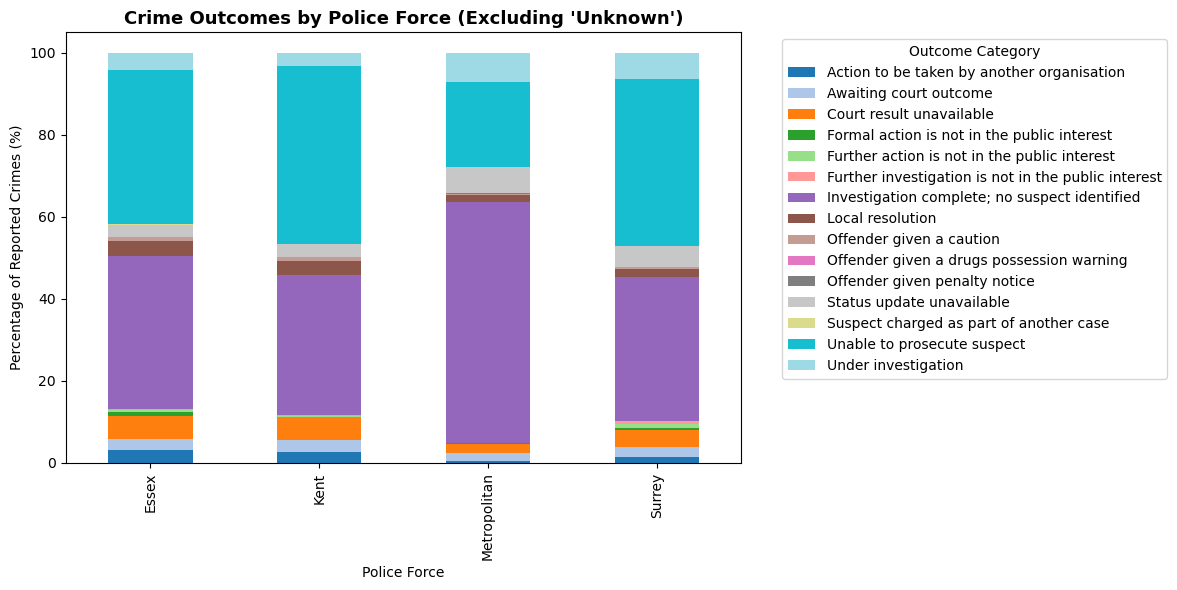

In [60]:
outcome_pivot = outcome_summary.pivot(
    index="Police_Force",
    columns="Last outcome category",
    values="Percent"
).fillna(0)

# --- Plot the stacked bar chart ---
outcome_pivot.plot(
    kind="bar",
    stacked=True,
    figsize=(12, 6),
    colormap="tab20"
)

plt.title("Crime Outcomes by Police Force (Excluding 'Unknown')", fontsize=13, weight="bold")
plt.xlabel("Police Force")
plt.ylabel("Percentage of Reported Crimes (%)")
plt.legend(title="Outcome Category", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

###  Insight: Crime Outcomes by Police Force (Excluding “Unknown”)

From the chart, it’s clear that the majority of reported crimes across all four police forces result in **“Investigation complete – no suspect identified.”**  
This outcome alone makes up around half or more of all known crime outcomes, showing that many cases are closed without a suspect being charged or identified.

The next most common outcomes are **“Unable to prosecute suspect”** and **“Under investigation.”**  
Together, these categories suggest that a significant portion of crimes either lack sufficient evidence for prosecution or are still being processed within the system.

The **Metropolitan Police** shows slightly higher proportions of unresolved outcomes (especially “Investigation complete – no suspect identified”), which aligns with the higher overall crime volume in London — making investigations more challenging.  
Meanwhile, **Kent**, **Essex**, and **Surrey** appear to have similar outcome patterns, with slightly higher shares of active investigations or prosecution-related outcomes compared to the Metropolitan area.

Overall, the data highlights that while a large share of cases are concluded without a suspect, smaller forces seem to manage a greater proportion of ongoing or resolved cases relative to their size.  
This may reflect differences in case workload, resource allocation, or the complexity of crimes handled in each region.

In [61]:
#For better visuals I created a summary table: top 3 outcomes per police force
top_outcomes = (
    outcome_summary
    .sort_values(["Police_Force", "Percent"], ascending=[True, False])
    .groupby("Police_Force")
    .head(3)  
    #.reset_index(drop=True)
)


In [66]:

print("Top 3 Crime Outcomes per Police Force:")
display(top_outcomes)

Top 3 Crime Outcomes per Police Force:


,Police Force,Outcome Category,Percent of Crimes (%)
12,Essex,Unable to prosecute suspect,37.78
6,Essex,Investigation complete; no suspect identified,37.38
2,Essex,Court result unavailable,5.44
26,Kent,Unable to prosecute suspect,43.54
20,Kent,Investigation complete; no suspect identified,34.15
16,Kent,Court result unavailable,5.46
34,Metropolitan,Investigation complete; no suspect identified,58.80
41,Metropolitan,Unable to prosecute suspect,20.96
42,Metropolitan,Under investigation,6.99
55,Surrey,Unable to prosecute suspect,40.93


### Interpretation
Across all four police forces, two outcomes dominate:
1. **Investigation complete – no suspect identified**
2. **Unable to prosecute suspect**

These outcomes together account for roughly **70–80%** of all recorded cases, suggesting that most crimes do not lead to a suspect being charged or prosecuted.  

The **Metropolitan Police** has the highest proportion of unresolved cases (nearly 59% with no suspect identified), reflecting the challenge of managing large urban crime volumes.  
Meanwhile, **Kent** and **Surrey** show slightly higher proportions of “Unable to prosecute” outcomes, which may indicate more suspects are being identified but cases not taken further due to lack of evidence or other legal constraints.  

Overall, this suggests that despite differences in region size and workload, **investigation limitations** and **prosecution challenges** are consistent issues across all forces.

## 5. Seasonal and Monthly Patterns
###  Question 5: Seasonal and Monthly Crime Patterns by Police Force

The heatmap below shows the total number of reported crimes for each month and police force between **September 2023 and September 2025**.  
Darker shades represent higher crime counts, while lighter shades indicate lower crime activity.
[⬅️ Back to Introduction](#introduction)

In [67]:
# Checking how crime changes by month and police force 

# Count how many crimes happened each month for each police force
monthly_trends = (
    clean_pf_data.groupby(["Year", "Month_name", "Police_Force"])
    .size()
    .reset_index(name="Total_Crimes")
)


In [68]:

# Making sure the months are in the right order (Jan–Dec)
month_order = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", 
               "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
monthly_trends["Month_name"] = pd.Categorical(
    monthly_trends["Month_name"],
    categories=month_order,
    ordered=True
)


In [69]:

# Reshape the data so months are rows and police forces are columns
heatmap_data = monthly_trends.pivot_table(
    index="Month_name",
    columns="Police_Force",
    values="Total_Crimes",
    aggfunc="sum"
)


In [70]:
heatmap_data

Police_Force,Essex,Kent,Metropolitan,Surrey
Month_name,,,,
Jan,24923,27913,163332,13102
Feb,23577,26379,159250,12440
Mar,26900,30430,168409,14182
Apr,25568,29246,166464,14187
May,25994,31680,175860,15381
Jun,26282,29566,176582,14982
Jul,28725,31781,184161,15030
Aug,27486,31245,175036,14658
Sep,38371,42478,255815,21123


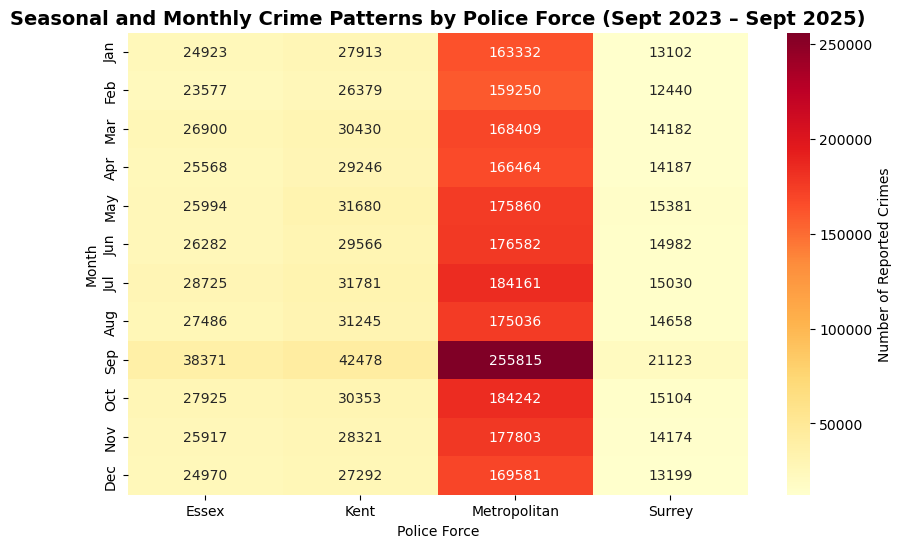

In [72]:

# Plotting the heatmap 
plt.figure(figsize=(10, 6))
sns.heatmap(
    heatmap_data,
    cmap="YlOrRd",           # Yellow to red colour scale
    annot=True,              # Show the numbers inside the boxes
    fmt=".0f",               # No decimal places
    cbar_kws={"label": "Number of Reported Crimes"}  # Colour bar label
)

plt.title(
    "Seasonal and Monthly Crime Patterns by Police Force (Sept 2023 – Sept 2025)",
    fontsize=14,
    weight="bold"
)
plt.xlabel("Police Force")
plt.ylabel("Month")
plt.xticks(rotation=0)
plt.show()

### Seasonal and Monthly Crime Patterns by Police Force

The heatmap above shows how crime levels changed across different months and police forces from **September 2023 to September 2025**.  
Darker shades represent higher crime counts, while lighter shades indicate lower crime levels.

#### Key Insights:
- **The Metropolitan Police** consistently reports the highest number of crimes throughout the year. The sharp peak in **September 2024** suggests a surge in reported offences during this period.  
- **Kent** and **Essex** follow similar monthly patterns, with moderate increases around **summer months (June–September)** when crime activity tends to rise.  
- **Surrey** records the fewest crimes overall, showing much lighter shading across all months.  
- A general pattern can be observed where crime levels **rise in late summer and early autumn** and **dip during winter months**, which is a trend often seen in UK crime data.

Overall, the heatmap suggests that **seasonal factors**—such as warmer weather, more social activity, and public events—may contribute to higher crime rates during mid-year periods.